In [ ]:
import torch
import torchvision

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 12.2MB/s 
     |████████████████████████████████| 901kB 34.4MB/s 
     |████████████████████████████████| 3.3MB 35.4MB/s 


In [ ]:
!pip install pytorch-lightning

     |████████████████████████████████| 808kB 9.6MB/s 
     |████████████████████████████████| 829kB 23.2MB/s 
     |████████████████████████████████| 276kB 32.9MB/s 
     |████████████████████████████████| 112kB 37.9MB/s 
     |████████████████████████████████| 645kB 35.2MB/s 
     |████████████████████████████████| 1.3MB 33.8MB/s 
     |████████████████████████████████| 296kB 34.9MB/s 
     |████████████████████████████████| 143kB 39.0MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=4bbc9d77fe1b1d07138953f370bc620bcf559ce6d1b9e843b0f523d30cb730f5
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install torchmetrics

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import transformers
#import pytorch_lightning as pl
import torchmetrics

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 42

sns.set(style = "whitegrid", palette= "muted", font_scale= 1.2)
rcParams["figure.figsize"] = 12, 8

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
!git clone git+https://github.com/furkan-celik/pytorch_lstmcrf

Cloning into 'pytorch_lstmcrf'...
remote: Enumerating objects: 717, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 717 (delta 129), reused 145 (delta 61), pack-reused 492
Receiving objects: 100% (717/717), 2.77 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (407/407), done.


In [ ]:
# python > 3.6
!conda create -n pt_lstmcrf python=3.6
!conda activate pt_lstmcrf
# kindly check https://pytorch.org for the suitable version of your machines
!conda install pytorch torchvision cudatoolkit=10.0 -c pytorch -n pt_lstmcrf
!pip install tqdm
!pip install termcolor
!pip install overrides
!pip install allennlp ## required when we need to get the ELMo vectors
!pip install transformers

/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
     |████████████████████████████████| 634kB 7.4MB/s 
     |████████████████████████████████| 1.2MB 11.3MB/s 
     |████████████████████████████████| 1.8MB 21.2MB/s 
     |████████████████████████████████| 133kB 36.6MB/s 
     |████████████████████████████████| 2.1MB 31.4MB/s 
     |████████████████████████████████| 266kB 36.7MB/s 
     |████████████████████████████████| 122kB 37.5MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 133kB 38.2MB/s 
     |████████████████████████████████| 174kB 30.4MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 7.5MB 37.0MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388727 sha256=59a50e9458dab9e6e9aeca054f89b3e6d9c943aa3db5276e288e0ad85ab6e1ee
  S

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing & Data import

In [ ]:
import copy

sentences = []
tags = []

with open("./en-train.txt", "r+") as inFile:
  sentence = []
  for line in inFile.readlines()[1:]:
    if "[SEP]" in line:
      sentence.append(["[SEP]","O"])
      sentences.append(copy.deepcopy(sentence))
      sentence = []
    elif len(line) > 0 and "\t" in line:
      sentence.append(line[:-1].split("\t"))
      tags.append(line[:-1].split("\t")[1])
  if sentence == []:
    sentences.append(copy.deepcopy(sentence))

In [ ]:
unique, counts = np.unique(tags, return_counts=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

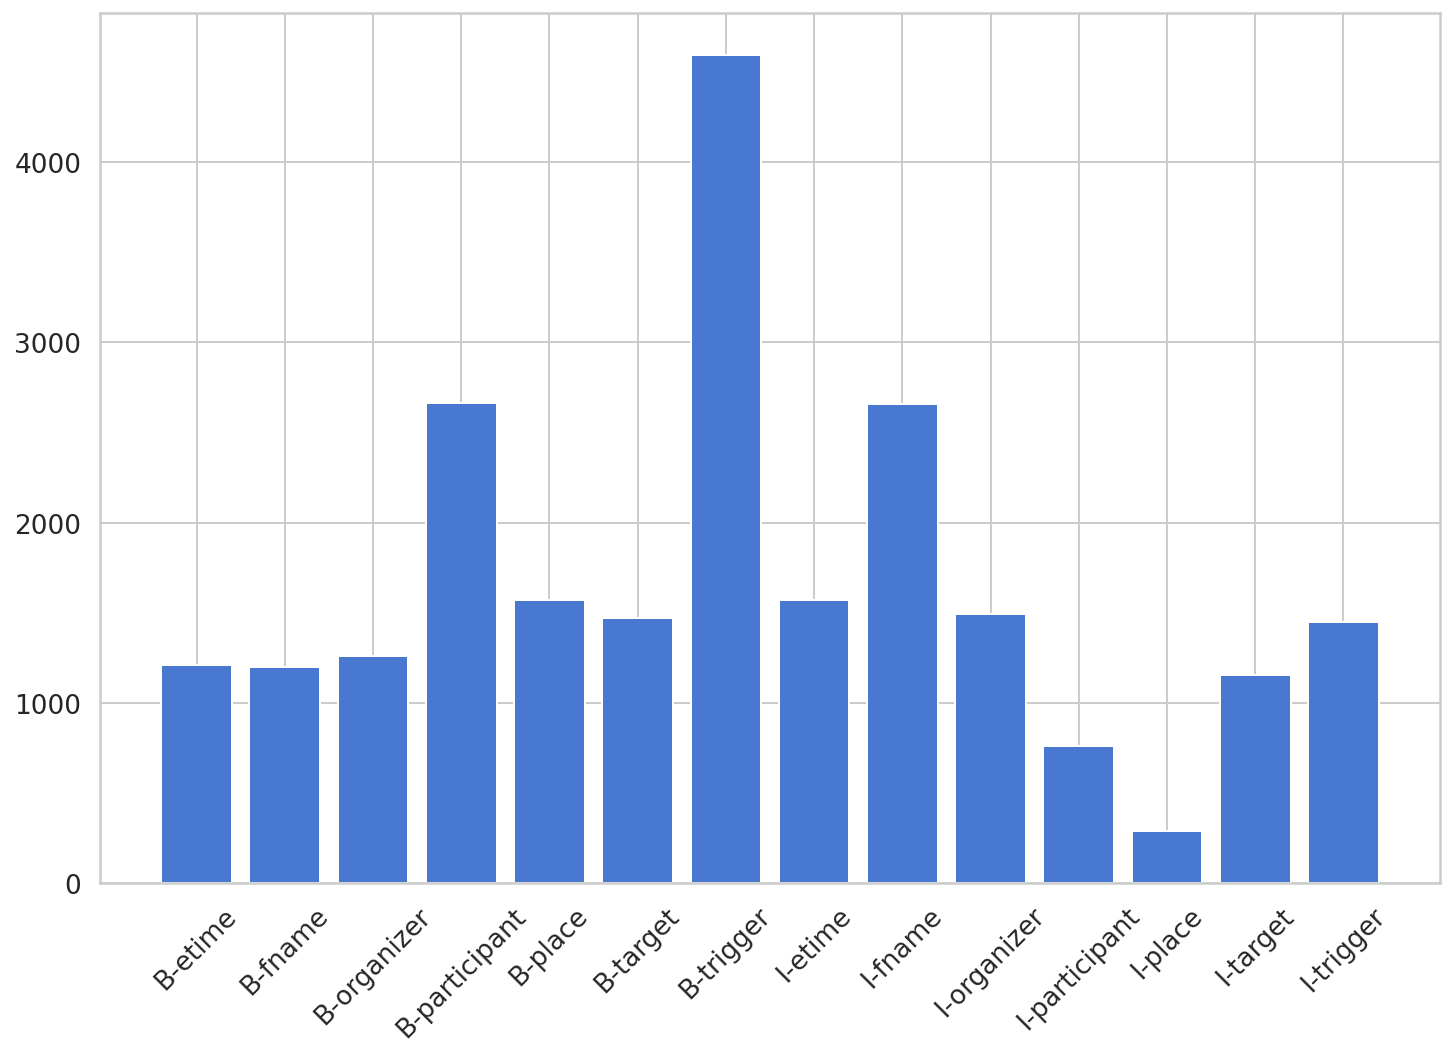

In [ ]:
plt.bar(unique[:-1], height=counts[:-1])
plt.xticks(rotation = 45)

In [ ]:
from sklearn.model_selection import train_test_split

# train_sents, test_sents = train_test_split(sentences, test_size = 0.2, random_state = 42)
train_sents, val_sents = train_test_split(sentences, test_size = 0.2, random_state = 42)

In [ ]:
import copy

sentences = []

with open("./test.txt", "r+") as inFile:
# with open("/content/sample_test.txt", "r+") as inFile:
  sentence = []
  for line in inFile.readlines():
    if "[SEP]" in line:
      sentence.append("[SEP]")
      sentences.append(copy.deepcopy(sentence))
      sentence = []
    elif len(line) > 0:
      sentence.append(line[:-1].split("\t"))
  if sentence != []:
    sentences.append(copy.deepcopy(sentence))

In [ ]:
test_sents = sentences

In [ ]:
import os
os.mkdir("/content/pytorch_lstmcrf/data/CASE_DATA")

In [ ]:
with open("/content/pytorch_lstmcrf/data/CASE_DATA/train.txt", "w") as fout:
  for sent in train_sents:
    for w, l in sent:
      fout.write(str(w) + " " + str(l) + "\n")
    fout.write("\n")

with open("/content/pytorch_lstmcrf/data/CASE_DATA/dev.txt", "w") as fout:
  for sent in val_sents:
    for w, l in sent:
      fout.write(str(w) + " " + str(l) + "\n")
    fout.write("\n")

with open("/content/pytorch_lstmcrf/data/CASE_DATA/test.txt", "w") as fout:
  for sent in test_sents:
    for w in sent:
      fout.write(w[0] + " " + "O" + "\n")
    fout.write("\n")

# Model

In [ ]:
%cd ./pytorch_lstmcrf/

/content/pytorch_lstmcrf


In [ ]:
!ls

data		  preprocess  trainer.py
docs		  README.md   transformers_predictor.py
ner_predictor.py  src	      transformers_trainer.py


use hidden_dim=0 for *-Linear-CRF model
use hidden_dim=200 for *-BiLSTM-CRF model

change embedder_type for different BERT embeddings

In [ ]:
!python ./transformers_trainer.py --device=cuda:0 --dataset=CASE_DATA --model_folder=robertaLstm163 --embedder_type=roberta-base --batch_size=16 --hidden_dim=200 --num_epochs=70

2021-05-20 07:58:12.288446: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
device: cuda:0
seed: 42
dataset: CASE_DATA
optimizer: adamw
learning_rate: 2e-05
momentum: 0.0
l2: 1e-08
lr_decay: 0
batch_size: 16
num_epochs: 70
train_num: -1
dev_num: -1
test_num: -1
max_no_incre: 30
max_grad_norm: 1.0
model_folder: robertaLstm163
hidden_dim: 200
dropout: 0.5
embedder_type: roberta-base
parallel_embedder: 0
add_iobes_constraint: 0
mode: train
test_file: data/conll2003_sample/test.txt
using GPU... 0
[Data Info] Tokenizing the instances using 'roberta-base' tokenizer
[Data Info] Reading dataset from: 
data/CASE_DATA/train.txt
data/CASE_DATA/dev.txt
data/CASE_DATA/test.txt
[Data Info] Reading file: data/CASE_DATA/train.txt, labels will be converted to IOBES encoding
[Data Info] Modify src/data/transformers_dataset.read_txt function if you have other requirements
100% 88007/88007 [00:00<00:00, 631206.18it/s]
number of sentence

In [ ]:
with open("./results/robertaLstm16.results", "r") as fin:
  with open("./results/submission.txt", "w+") as fout:
    lines = fin.readlines()
    for i in range(len(lines)):
      line = lines[i]
      words = line.split()
      if len(words) > 1:
        if (words[1] == "[" or words[1] == "]") and (lines[i + 1].strip() == ""):
          words[1] = "[SEP]"
        if "S" in words[3]:
          words[3] = "B" + words[3][1:]
        if "E" in words[3]:
          words[3] = "I" + words[3][1:]
        if words[1] == "O" and words[3] == "O":
          words[1] = words[3] = ""
        fout.write(words[1] + "\t" + words[3] + "\n")
      else:
        pass

# Check Integrity of the submission file

In [ ]:
with open("/content/pytorch_lstmcrf/results/submission.txt", "r") as subFile:
  with open("./test.txt", "r+") as testFile:
    # with open("./submissionCorrected.txt", "r+") as correctFile:
      testString = ""
      subString = ""
      tags = []
      testLines = testFile.readlines()
      for i in range(len(testLines)):
        line = testLines[i]
        testString += line[:line.rfind("\t")].strip()
        lineSub = subFile.readline()
        subString += lineSub[:lineSub.rfind("\t")].strip()
        tags += [lineSub[lineSub.rfind("\t"):].strip()]
        if line[:line.find("\t")].strip() != lineSub[:lineSub.find("\t")].strip():
          print(i, "\t", line[:line.find("\t")].strip(), "\t", lineSub[:lineSub.find("\t")].strip())

In [ ]:
testString

In [ ]:
subString

In [ ]:
np.unique(tags)

array(['', 'B-etime', 'B-fname', 'B-organizer', 'B-participant',
       'B-place', 'B-target', 'B-trigger', 'I-etime', 'I-fname',
       'I-organizer', 'I-participant', 'I-place', 'I-target', 'I-trigger',
       'O'], dtype='<U13')

In [ ]:
testString == subString